In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

In [2]:
errors = np.random.normal(0,1,400)

In [3]:
#generating data


In [4]:
date_index = pd.date_range(start='9/1/2019', end='1/1/2020')

In [5]:
mu = 50
series = []
for t in range(1, len(date_index)+1):
    series.append(mu + .4*errors[t-1] + .3*errors[t-2] + errors[t])

In [6]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))

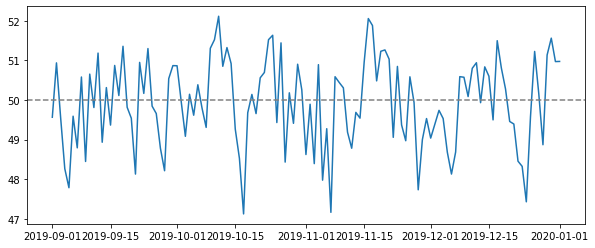

In [7]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

In [8]:
def calc_corr(series, lag):
    return pearsonr(series[:-lag], series[lag:])[0]

## ACF


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


<BarContainer object of 10 artists>

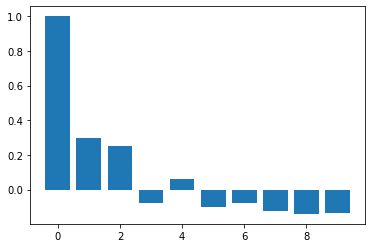

In [9]:
acf_vals =acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])

## PACF

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


<BarContainer object of 25 artists>

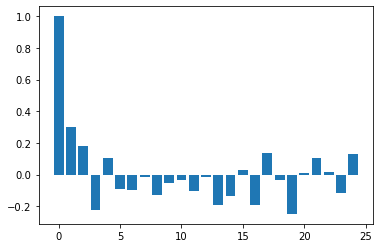

In [10]:
pacf_vals =pacf(series)
num_lags = 25
plt.bar(range(num_lags), pacf_vals[:num_lags])

## Get training and testing sets

In [11]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

## Fit ARIMA Model

In [12]:
model = ARIMA(train_data, order=(0,0,2))

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [13]:
#fit model
model_fit = model.fit()

In [14]:
#summary
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  121
Model:                     ARMA(0, 2)   Log Likelihood                -174.552
Method:                       css-mle   S.D. of innovations              1.023
Date:                Mon, 21 Jun 2021   AIC                            357.103
Time:                        21:55:16   BIC                            368.286
Sample:                    09-01-2019   HQIC                           361.645
                         - 12-30-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9248      0.150    332.816      0.000      49.631      50.219
ma.L1.y        0.3290      0.099      3.337      0.001       0.136       0.522
ma.L2.y        0.2914      0.086      3.385      0.0

# Predict Model

In [15]:
#prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[1]

In [16]:
#predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [17]:
residuals = test_data - predictions

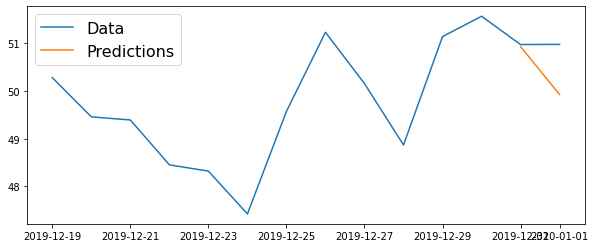

In [18]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [19]:

print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.0107


In [20]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 0.7417190776572808
